# Eros Moreira Ferreira

Solução numérica de EDO pelo método de Euler (foward e backward).

In [88]:
import numpy as np

# EDO do exemplo.
def EDOfun(t, y):
    return np.cos(2 * y)

# variáveis utilizandas.
tspan = [0, 1]  #ti = 0, tf = 1
y0 = np.array([0]) #y0 = 0
Nh = 10

In [89]:
# Foward Euler
def feuler(odefun, tspan, y, Nh):
    h = (tspan[1] - tspan[0]) / Nh  # tamanho do time step
    tt = np.linspace(tspan[0], tspan[1], Nh+1) # Time step
    
    for t in tt[1:]:
        y_new = y[-1] + h * odefun(t, y[-1])
        y = np.vstack((y, y_new))
    return tt, y

t, y = feuler(EDOfun, tspan, y0, Nh)

In [63]:
from scipy.optimize import fsolve

# Backward Euler
def beuler(odefun, tspan, y, Nh):
    h = (tspan[1] - tspan[0]) / Nh # tamanho time step
    tt = np.linspace(tspan[0], tspan[1], Nh+1) # time step
    
    for t in tt[:-1]:
        # Define o sistema de eq
        f = lambda w: w - y[-1] - h * odefun(t, w)
        
        # Resolve o sistema de eq
        w = fsolve(f, y[-1])[0]
        
        y = np.vstack((y, w))
    
    return tt, y

tb, yb = beuler(EDOfun, tspan, y0, Nh)

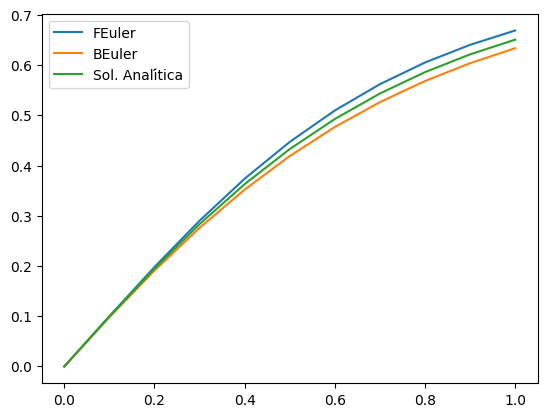

In [64]:
import matplotlib.pyplot as plt

# solução exata.
time_step = np.linspace(tspan[0], tspan[1], Nh+1)
sol_analitica = lambda t: 0.5 * np.arcsin((np.exp(4 * t) - 1) / (np.exp(4 * t) + 1))



plt.plot(t, y, label='FEuler')
plt.plot(tb, yb, label='BEuler')
plt.plot(time_step, sol_analitica(time_step), label='Sol. Analítica')
plt.legend()
plt.show()

In [107]:
# Reproduzindo o exemplo

Nh = 2
fe = np.zeros(10)
be = np.zeros(10)
for k in range(0, 10):
    t, y = feuler(EDOfun, tspan, y0, Nh)
    fe[k] = abs(y[-1,0] - sol_analitica(time_step[-1]))
    t, yb = beuler(EDOfun, tspan, y0, Nh)
    be[k] = abs(yb[-1,0] - sol_analitica(time_step[-1]))
    Nh *= 2


p = np.log(abs(fe[0:- 1] / fe[1:])) / np.log(2)
print(p)
pb = np.log(abs(be[0:- 1] / be[1:])) / np.log(2)
print(pb)

[1.28982755 1.08098453 1.0349118  1.01639521 1.00796161 1.00392498
 1.00194891 1.0009711  1.00048472]
[0.90703442 0.94835259 0.97198085 0.98530486 0.99246202 0.99618084
 0.99807754 0.99903551 0.99951693]
